Pada kesempatan kali ini akan dilakukan pembangkitan gelombang, menggunakan persamaan gelombang. Gelombang akan ditambahkan dengan gelombang lain (gelombang komposit), kemudian akan ditambahkan noise. Kemudian akan dilakukan analisis fourier untuk mengembalikan ke gelombang komposit.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#batas waktu
bt =1
#batas sampling
N = 1000
#membuat matriks t
t=np.linspace(-1*bt,bt,N)

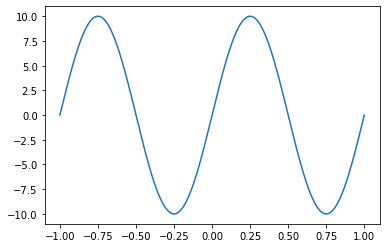

In [ ]:
#frekuensi
f1 = 1
#amplitudo
A1 = 10
#pembuatan matriks gelombang
w1 = A1*np.sin(2*np.pi*f1*t)

plt.plot(t,w1)
plt.show()

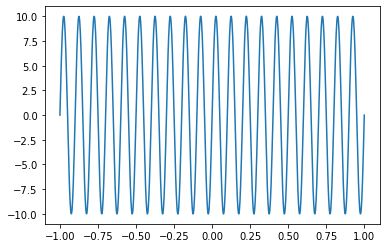

In [ ]:
#frekuensi
f2 = 10
#amplitudo
A2 = 10
#pembuatan matriks gelombang
w2 = A2*np.sin(2*np.pi*f2*t)

plt.plot(t,w2)
plt.show()

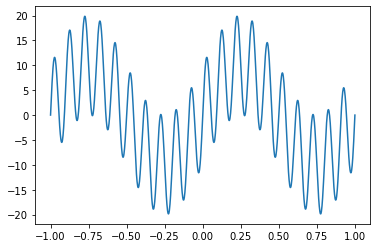

In [ ]:
#penjumlahan gelombang 1 dan gelombang 2
w3 = w1 + w2

plt.plot(t,w3)
plt.show()

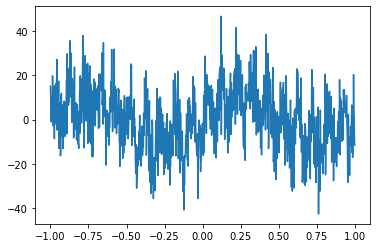

In [ ]:
#penjumlahan gelombang 1 dan gelombang 2
w4 = w3 + np.random.normal(np.mean(w1),10,N)

plt.plot(t,w4)
plt.show()

# Filter Sinyal dengan Analisis Frekuensi

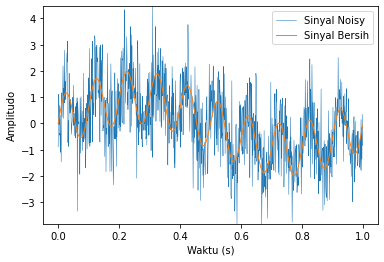

In [ ]:
#pembangkitan sinyal
dt = 0.001
t = np.arange(0, 1, dt)
sinyal = np.sin(2*np.pi*1*t) + np.sin(2*np.pi*10*t) #gelombang komposit
sinyal_bersih = sinyal #untuk komparasi
sinyal = sinyal + np.random.normal(np.mean(w1),1,len(t)) #penambahan noise
minsinyal, maxsinyal = sinyal.min(), sinyal.max()

#visualisasi
plt.plot(t, sinyal, lw=0.5, label='Sinyal Noisy')
plt.plot(t, sinyal_bersih, lw=1, label='Sinyal Bersih')
plt.ylim([minsinyal, maxsinyal])
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.legend()
plt.show()

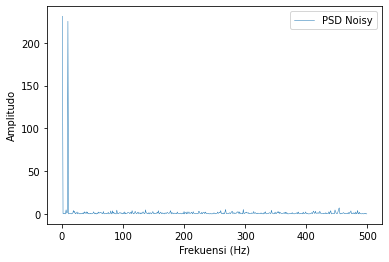

In [ ]:
# Fast Fourier Transform
n = len(t)
fhat = np.fft.fft(sinyal, n) #menghitung fft
psd = fhat * np.conj(fhat)/n
freq = (1/(dt*n)) * np.arange(n) #membuat array frekuensi
idxs_half = np.arange(1, np.floor(n/2), dtype=np.int32) #indeks setengah pertama

#visualisasi
plt.plot(freq[idxs_half], np.abs(psd[idxs_half]), lw=0.5, label='PSD Noisy')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitudo')
plt.legend()

berdasarkan hasil fast fourier transform, terlihat bahwa sinyal bersih terdapat pada amplitudo yang tinggi sedangkan noise cenderung memiliki amplitudo yang rendah, sehingga dapat dihilangkan gelombang dengan frekuensi dengan amplitudo rendah tersebut.

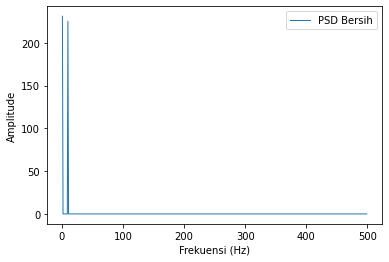

In [ ]:
#filterisasi noise berdasarkan batas frekuensi
batas = 100
psd_idxs = psd > batas #membuat array 1 dan 0 berdasarkan kondisi
psd_bersih = psd * psd_idxs #nolkan frekuensi yang tidak sesuai kriteria
fhat_bersih = psd_idxs * fhat #sinyal yang sudah di filter

#visualisasi
plt.plot(freq[idxs_half], np.abs(psd_bersih[idxs_half]), lw=1, label='PSD Bersih')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitude')
plt.legend()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


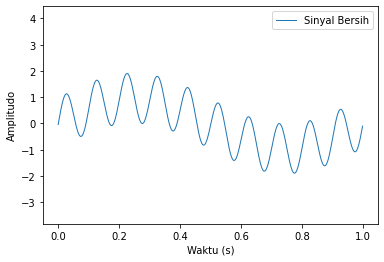

In [ ]:
sinyal_filtered = np.fft.ifft(fhat_bersih) #inverse fourier transform

#visualisasi
plt.plot(t, sinyal_filtered, lw=1, label='Sinyal Bersih')
plt.ylim([minsinyal, maxsinyal])
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.legend()